In [123]:
import numpy as np
from scipy.stats import chi2
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

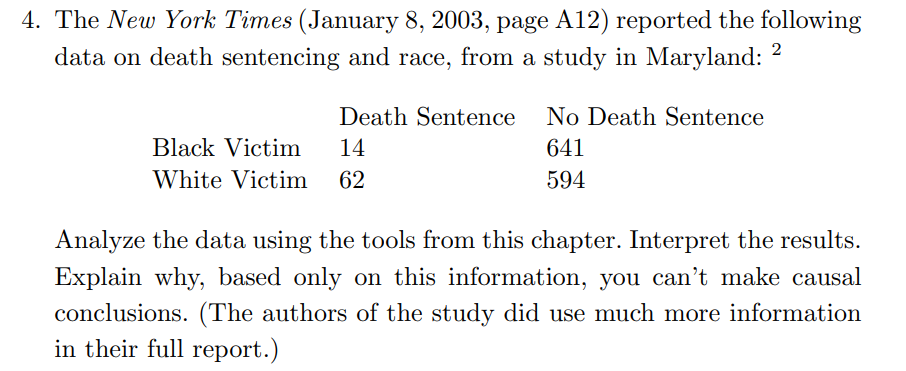

In [2]:
df = pd.DataFrame([[14, 641], [62, 594]], columns=['Death Sentence', 'No Death Sentence'], index=['Black Victim', 'White Victim'])
X = df.to_numpy()
df.loc['Total'] = df.sum(axis=0)
df['Total'] = df.sum(axis=1)
df


,Death Sentence,No Death Sentence,Total
Black Victim,14,641,655
White Victim,62,594,656
Total,76,1235,1311


In [3]:
n = df.loc['Total', 'Total']
Xi_ = df.loc[['Black Victim', 'White Victim'], 'Total']
X_i = df.loc['Total', ['Death Sentence', 'No Death Sentence']]


In [4]:
pdata = df/n
pi_, p_i = Xi_ / n, X_i / n
pdata

,Death Sentence,No Death Sentence,Total
Black Victim,0.010679,0.488940,0.499619
White Victim,0.047292,0.453089,0.500381
Total,0.057971,0.942029,1.000000


In [5]:
E = n * pi_.to_numpy().reshape(2, 1) @ p_i.to_numpy().reshape(1, 2)
E

array([[ 37.97101449, 617.02898551],
       [ 38.02898551, 617.97101449]])

In [6]:
U = np.sum((X - E) ** 2 / E)
U

32.10370934362603

In [7]:
pvalue = 1 - chi2.cdf(U, df = 1)
pvalue

1.4615798793471413e-08

In [8]:
T = 2 * np.sum(X * np.log(X / E))
T

34.53350589468162

In [9]:
pvalue_T = 1 - chi2.cdf(T, df = 1)
pvalue

1.4615798793471413e-08

There is statistical evidence that the proportions are not the same and therefore victim race and death sentence are not independent. This, however, is not enough to claim a causal relationship. For example race of the victim could correlate with race or socioeconomic status of the perpetrator which could have an influence.

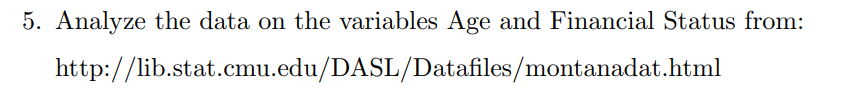

Data Information:

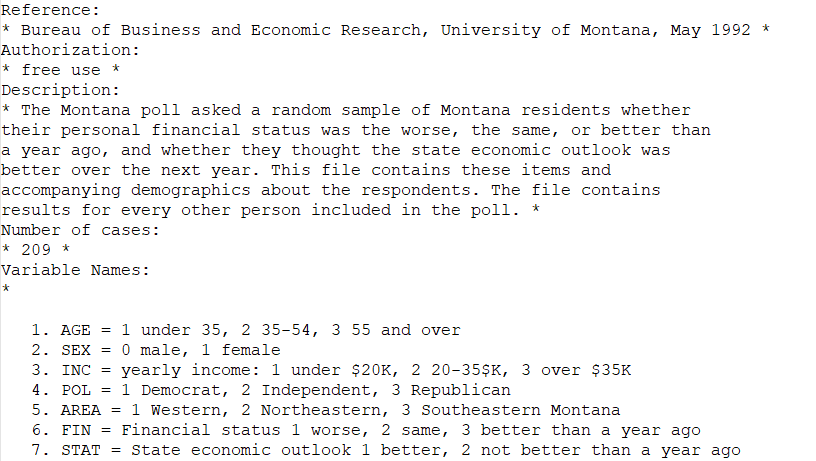

In [10]:
fulldata = pd.read_csv('montana.txt', sep='\t')
data = fulldata.filter(['AGE', 'FIN'])
data = data.replace('*', pd.NA).dropna()
data

,AGE,FIN
0,3,2
1,2,3
2,1,2
3,3,1
4,3,2
...,...,...
203,1,3
205,1,3
206,3,2
207,3,1


In [11]:
Xdf = pd.crosstab(data['AGE'], data['FIN'])
Xdf

FIN,1,2,3
AGE,,,
1,21,16,34
2,17,23,26
3,22,37,11


In [12]:
X = Xdf.to_numpy()
X

array([[21, 16, 34],
       [17, 23, 26],
       [22, 37, 11]], dtype=int64)

In [13]:
n = np.sum(X)
print(n)

I, J = X.shape

X_i = np.sum(X, axis = 0).reshape(1, 3)
print(X_i)
Xi_ = np.sum(X, axis = 1).reshape(3, 1)
print(Xi_)

E = Xi_ @ X_i / n
print(E)

207
[[60 76 71]]
[[71]
 [66]
 [70]]
[[20.57971014 26.06763285 24.352657  ]
 [19.13043478 24.23188406 22.63768116]
 [20.28985507 25.70048309 24.00966184]]


In [14]:
U = np.sum((X - E) ** 2 / E)
U

20.67931434486018

In [15]:
pvalue = 1 - chi2.cdf(U, df = (I - 1) * (J - 1))
print(pvalue)

0.0003665589857164697


In [16]:
T = 2 * np.sum(X * np.log(X / E))
T

22.06371457028409

In [17]:
pvalueT = 1 - chi2.cdf(T, df = (I - 1) * (J - 1))
print(pvalueT)

0.00019465157757225793


There is statistical evidence that age and financial status are not independant

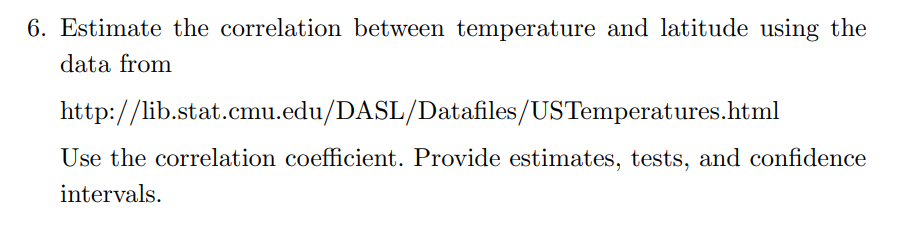

Data Information

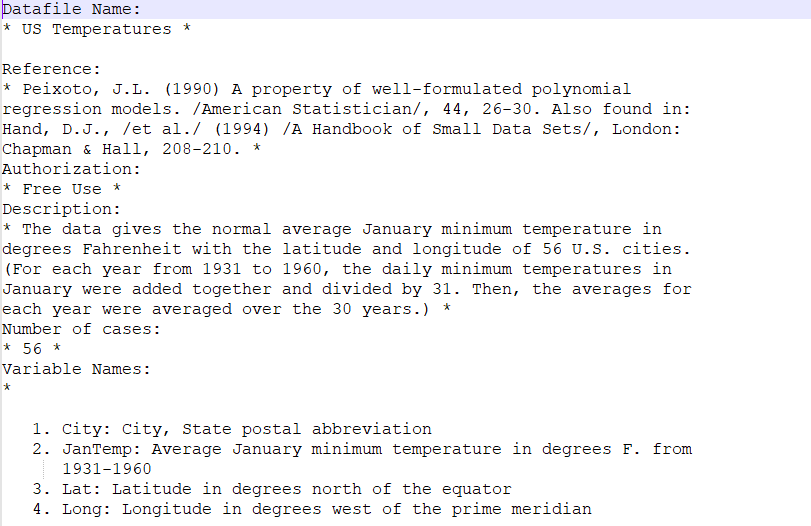

In [18]:
fulldata = pd.read_csv('temp.txt', sep='\t')
data = fulldata.filter(['JanTemp', 'Lat', 'Long']).dropna()
n = len(data)
data.head()

,JanTemp,Lat,Long
0,44,31.2,88.5
1,38,32.9,86.8
2,35,33.6,112.5
3,31,35.4,92.8
4,47,34.3,118.7


In [19]:
data.corr()

,JanTemp,Lat,Long
JanTemp,1.000000,-0.848035,0.023942
Lat,-0.848035,1.000000,0.144769
Long,0.023942,0.144769,1.000000


We see very little correlation between Long and JanTemp, but a large negative correlation between Lat and JanTemp

In [20]:
rhohat = data.corr().loc['Lat', 'JanTemp']
print(rhohat)

-0.8480352058672054


In [21]:
rhohat

-0.8480352058672054

In [85]:
X = data.filter(['JanTemp', 'Lat']).to_numpy()
print(X.shape)
n, k = X.shape

B=2500
choicedict = dict(enumerate(X))
indices = np.random.randint(low=0, high=n, size=n*B)
choices = np.array([choicedict[i] for i in indices])
XBoot = np.reshape(choices, (n, B, 2))
XBoot.shape

(56, 2)


(56, 2500, 2)

In [99]:
XBootbars = np.mean(XBoot, axis=0)
XBootvars = np.var(XBoot, axis=0, ddof=1)
print(XBootvars.shape)
corrs = np.sum(np.prod(XBoot - XBootbars, axis=2), axis=0)/ (np.sqrt(np.prod(XBootvars, axis=1)) * (n - 1))
print(np.mean(corrs))
se = corrs.std()
print(se)


(2500, 2)
-0.8450012336003794
0.06104072578183023


In [103]:
alpha = 0.05

quantileC = np.quantile(corrs, alpha / 2), np.quantile(corrs, 1 - alpha / 2)
print(quantileC)

(-0.9403481460133043, -0.7023696203658379)


In [108]:
normC = (rhohat + se * norm.ppf(alpha / 2), rhohat + se * norm.ppf(1 - alpha / 2))
print(normC)

pvalue = 2 * norm.cdf(rhohat/se)
print(pvalue)

(-0.9676728299897782, -0.7283975817446326)
6.99048975648616e-44


We see we are several standard deviations away from zero and so there is much statistical evidence that there is zero correlation between latitude and January Temperature

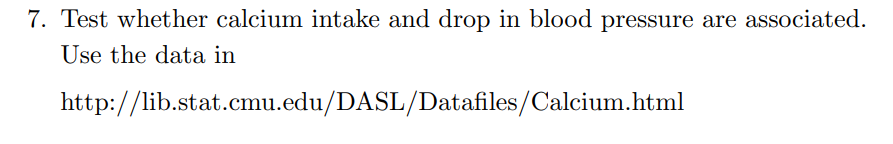

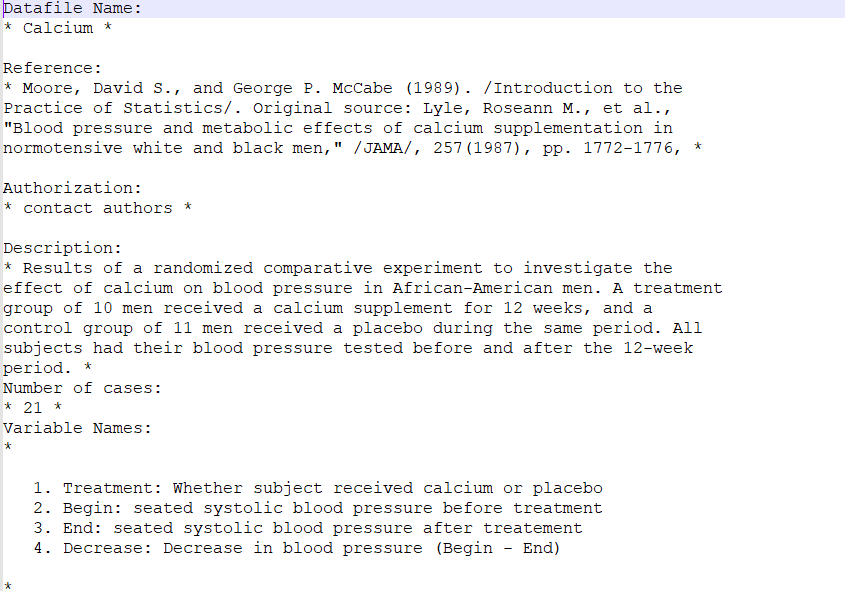

In [120]:
data = pd.read_csv('calcium.txt', sep='\t').filter(['Treatment', 'Decrease'])
data = data.replace(['Calcium', 'Placebo'], [1, 0])
data

,Treatment,Decrease
0,1,7
1,1,-4
2,1,18
3,1,17
4,1,-3
5,1,-5
6,1,1
7,1,10
8,1,11
9,1,-2


array([ 7, -4, 18, 17, -3, -5,  1, 10, 11, -2], dtype=int64)

I use the two sample Kolmogorov-Smirnov test, but this is mostly suited to large samples and therefore is not ideal here

In [170]:
Treatment = data.loc[data['Treatment'] == 1]['Decrease'].to_numpy()
Placebo = data.loc[data['Treatment'] == 0]['Decrease'].to_numpy()
n1 = len(Treatment)
n2 = len(Placebo)

def F1(X):
    def single(x):
        return np.sum((Treatment <= x)) / len(Treatment)
    return np.vectorize(single)(X)

def F2(X):
    def single(x):
        return np.sum((Placebo <= x)) / len(Placebo)
    return np.vectorize(single)(X)

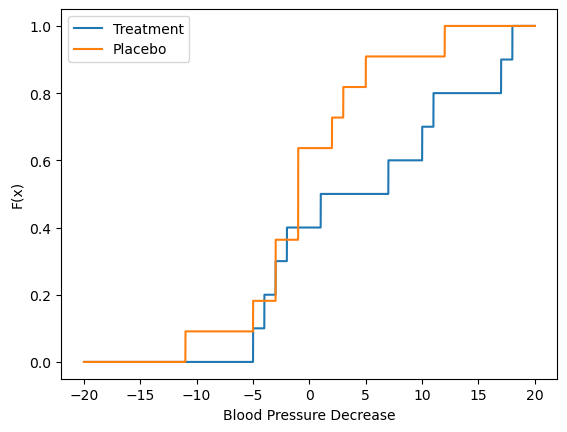

In [171]:
xs = np.linspace(-20, 20, 10000)
y1 = F1(xs)
y2 = F2(xs)

plt.plot(xs, y1, label = 'Treatment')
plt.plot(xs, y2, label = 'Placebo')
plt.xlabel('Blood Pressure Decrease')
plt.ylabel('F(x)')
plt.legend()
plt.show()

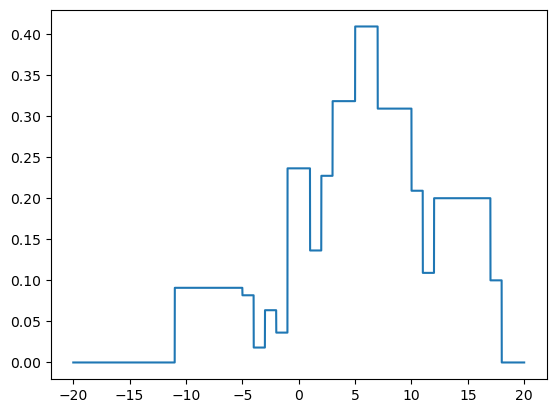

In [172]:
Diff = np.abs(y1 - y2)
plt.plot(xs, Diff)
plt.show()

In [173]:
D = np.max(Diff)
D

0.40909090909090906

In [174]:
def H(t, err = 1E-8):
    jmax = int(np.ceil(np.sqrt(- np.log(err / 2) / (2 * t ** 2))))
    js = np.arange(1, jmax)

    return 1 - 2 * np.sum((- 1) ** (js - 1) * np.exp(- 2 * js ** 2 * t ** 2))

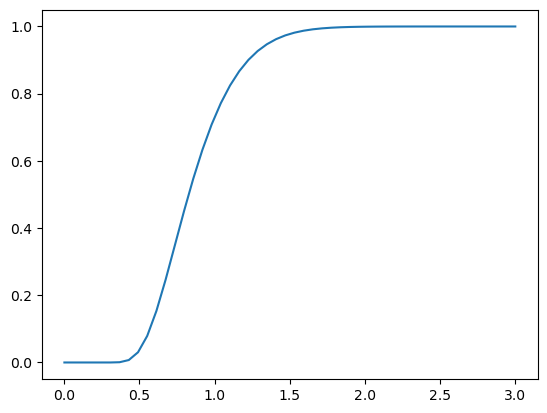

In [175]:
xs = np.linspace(0.001, 3)
Hs = np.vectorize(H)(xs)
plt.plot(xs, Hs)
plt.show()

In [184]:
test_statistic = np.sqrt(n1 * n2 / (n1 + n2)) * D
alpha = 0.05

print(H(test_statistic))

0.6553786366367438


We see that $H\left(\sqrt{\frac{n_1n_2}{n_1 + n_2}}D\right) < 1-\alpha$ which mean we do not reject $H_0$

I now investigate what $H^{-1}(t)$ looks like

In [176]:
from scipy.optimize import minimize

In [177]:
def H_inv(t):
    minfun = lambda x: (t - H(x)) ** 2
    return minimize(minfun, 1, method='Nelder-Mead').x

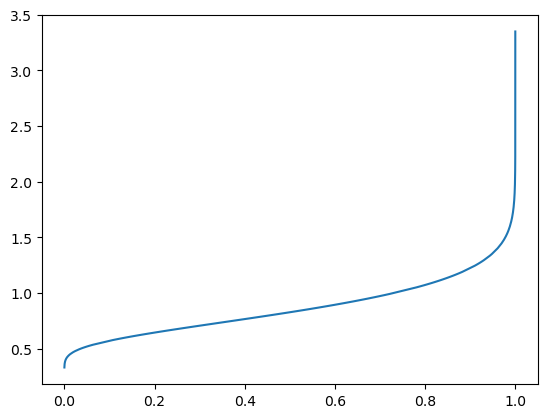

In [179]:
xs = np.linspace(0.0001, 1, 10000)
Hinvs = np.vectorize(H_inv)(xs)
plt.plot(xs, Hinvs)
plt.show()

In [182]:
alpha = 0.05

test_statistic = np.sqrt(n1 * n2 / (n1 + n2)) * D
Hinv_statistic = H_inv(1 - alpha)
print('test statistic = ', test_statistic)
print('Hinv statistic = ', Hinv_statistic)

test statistic =  0.936281675898539
Hinv statistic =  [1.35810547]


Since the test statistic is smaller than $H^{-1}(1 - \alpha)$, we do not reject $H_0$